In [41]:
import tensorflow as tf

In [42]:
tf.__version__

'2.8.0'

In [43]:
(xtrain,ytrain),(xtest,ytest) = tf.keras.datasets.boston_housing.load_data()

In [44]:
xtest.shape

(102, 13)

In [45]:
ytest.shape

(102,)

### Build a Model

In [46]:
norm = tf.keras.layers.Normalization()
norm.adapt(xtrain)
norm_xtrain = norm(xtrain)
norm_xtest = norm(xtest)

In [47]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape =(13,), activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                448       
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


### compile the model

In [48]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'mean_absolute_error',
)

In [49]:
es = tf.keras.callbacks.EarlyStopping(patience=5)

In [50]:
history = model.fit(
    x= xtrain,
    y = ytrain,
    epochs =100,
    validation_data = [xtest, ytest],
    callbacks = [es]
)

Epoch 1/100
13/13 [==============================] - 0s 9ms/step - loss: 86.3619 - val_loss: 39.8882
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 29.2669 - val_loss: 22.9332
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 13.8292 - val_loss: 9.6157
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 8.7861 - val_loss: 6.9880
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 6.2380 - val_loss: 5.9902
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 5.3989 - val_loss: 5.8429
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 5.1961 - val_loss: 5.7624
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 5.2520 - val_loss: 5.6753
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 5.1625 - val_loss: 5.8628
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 5.1441 - val_loss: 6.0322
Epoc

In [51]:
import pandas as pd

In [52]:
df = pd.DataFrame(history.history)
df['epoch'] = history.epoch
df.head()

,loss,val_loss,epoch
0,86.361916,39.888241,0
1,29.266918,22.933243,1
2,13.829174,9.615682,2
3,8.786082,6.987969,3
4,6.238046,5.990156,4


In [53]:
import plotly.express as px
import matplotlib.pyplot as plt

In [54]:
def plot_loss(df):
    plt.plot(df['loss'], label= 'training loss')
    plt.plot(df['val_loss'], label= 'validation loss')
    plt.ylim([0,10])
    plt.ylabel('epoch')
    plt.ylabel('ERROR (MAE)')
    plt.legend()
    plt.grid(True)

def plot_acc(df):
    plt.plot(df['accuracy'], label= 'training accuracy')
    plt.plot(df['val_accuracy'], label= 'validation accuracy')
    plt.ylim([0,10])
    plt.ylabel('epoch')
    plt.ylabel('ERROR (MAE)')
    plt.legend()
    plt.grid(True)

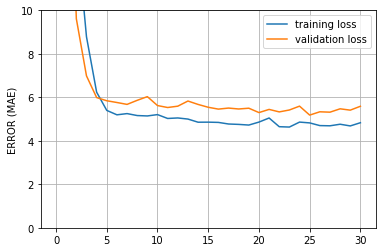

In [55]:
plot_loss(df)
plt.show()

### save model

In [56]:
model.save('boston_house_pricing')

INFO:tensorflow:Assets written to: boston_house_pricing\assets


In [57]:
model.save('boston.h5', save_format='h5')

### load model

In [58]:
tf.keras.models.load_model('boston_house_pricing')

### prediction

In [60]:
ypred = model.predict(xtest)

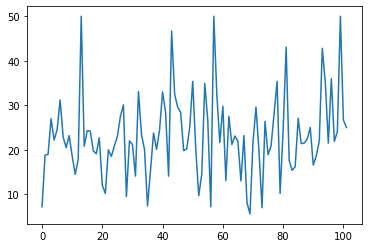

In [61]:
plt.plot(ytest)